In [74]:
#check if libraries are installed
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")

Imported all libraries successfully...


In [75]:
#create dataframe from csv of gun violence data
dataframe=pd.read_csv("shooting-1982-2023.csv")

In [76]:
pd.set_option("display.max_rows", 141)

In [77]:
dataframe

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Nashville religious school shooting,"Nashville, TN",3-27-23,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28,-,...,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,Michigan State University shooting,"East Lansing, Michigan",2-13-23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,...,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,Half Moon Bay spree shooting,"Half Moon Bay, California",1-23-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,...,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,LA dance studio mass shooting,"Monterey Park, California",1-21-23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,yes,...,-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,Virginia Walmart shooting,"Chesapeake, Virginia",11-22-22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,-,...,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022
5,LGBTQ club shooting,"Colorado Springs, Colorado",11-19-22,"Anderson L. Aldrich, 22, wore body armor and o...",5,25,30,Other,22,yes,...,-,-,semiautomatic rifle; semiautomatic handgun,-,White,M,-,-,Mass,2022
6,University of Virginia shooting,"Charlottesville, Virginia",11-13-22,"Christopher Darnell Jones Jr., 22, allegedly o...",3,2,5,School,22,-,...,yes,"Dance's Sporting Goods; Colonial Heights, VA",semiautomatic pistol,Glock 45 9mm; Ruger AR-556 rifle (in his dorm ...,Black,M,-,-,Mass,2022
7,Raleigh spree shooting,"Hedingham, North Carolina",10-13-22,"Austin Thompson, 15, went on a rampage in the ...",5,2,7,Other,15,-,...,-,-,"shotgun, semiautomatic handgun",NaN,White,M,-,-,Spree,2022
8,Greenwood Park Mall shooting,"Greenwood, Indiana",7-17-22,"Jonathan Sapirman, 20, opened fire in a mall f...",3,2,5,workplace,20,-,...,yes,in Greenwood,semiautomatic rifles; semiautomatic handgun,Sig Sauer M400 rifle,White,M,-,-,Mass,2022
9,Highland Park July 4 parade shooting,"Highland Park, Illinois",7-4-22,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7,46,53,Other,21,-,...,yes,"legally purchased by the shooter in the ""great...",semiautomatic rifle,"AR-15 style rifle, possibly modified for rapid...",White,M,-,-,Mass,2022


In [78]:
#create a new column with state names
location = dataframe["location"]
state = []
for i in location:
    i = i.split(", ")
    i = i[1]
    if i == "TN":
        i = "Tennessee"
    state.append(i)
state = pd.Series(state)
dataframe.insert(loc=0, column='state', value=state)
dataframe

,state,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Tennessee,Nashville religious school shooting,"Nashville, TN",3-27-23,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28,...,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,Michigan,Michigan State University shooting,"East Lansing, Michigan",2-13-23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,...,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,California,Half Moon Bay spree shooting,"Half Moon Bay, California",1-23-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,...,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,California,LA dance studio mass shooting,"Monterey Park, California",1-21-23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,...,-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,Virginia,Virginia Walmart shooting,"Chesapeake, Virginia",11-22-22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,...,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022
5,Colorado,LGBTQ club shooting,"Colorado Springs, Colorado",11-19-22,"Anderson L. Aldrich, 22, wore body armor and o...",5,25,30,Other,22,...,-,-,semiautomatic rifle; semiautomatic handgun,-,White,M,-,-,Mass,2022
6,Virginia,University of Virginia shooting,"Charlottesville, Virginia",11-13-22,"Christopher Darnell Jones Jr., 22, allegedly o...",3,2,5,School,22,...,yes,"Dance's Sporting Goods; Colonial Heights, VA",semiautomatic pistol,Glock 45 9mm; Ruger AR-556 rifle (in his dorm ...,Black,M,-,-,Mass,2022
7,North Carolina,Raleigh spree shooting,"Hedingham, North Carolina",10-13-22,"Austin Thompson, 15, went on a rampage in the ...",5,2,7,Other,15,...,-,-,"shotgun, semiautomatic handgun",NaN,White,M,-,-,Spree,2022
8,Indiana,Greenwood Park Mall shooting,"Greenwood, Indiana",7-17-22,"Jonathan Sapirman, 20, opened fire in a mall f...",3,2,5,workplace,20,...,yes,in Greenwood,semiautomatic rifles; semiautomatic handgun,Sig Sauer M400 rifle,White,M,-,-,Mass,2022
9,Illinois,Highland Park July 4 parade shooting,"Highland Park, Illinois",7-4-22,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7,46,53,Other,21,...,yes,"legally purchased by the shooter in the ""great...",semiautomatic rifle,"AR-15 style rifle, possibly modified for rapid...",White,M,-,-,Mass,2022


In [79]:
#transform state names into numerical data

#red states list
red = ["Idaho","Utah","Arizona","Montana","Wyoming","North Dakota","South Dakota","Kansas","Oklahoma","Texas","Louisiana", "Arkansas","Missouri","Alabama","Tennessee","Kentucky","Mississippi","Georgia","South Carolina","North Carolina","West Virginia","Alaska","Indiana","Lousiana","Nebraska"]
blue = ["Washington","Oregon","California","Nevada","Colorado","New Mexico","Wisconsin","Illinois","Michigan","Pennsylvania","New York","Vermont","New Hampshire","Maine","Massachusetts","Connecticut","Rhode Island","New Jersey", "Maryland","Delaware","Virginia", "Hawaii","D.C.","Minnesota"]
swing = ["Florida","Ohio","Iowa"]

count = 0
political_affiliation = []
for i in state:
    if i in red:
        factor = int(0)
        political_affiliation.append(factor)
    elif i in blue:
        factor = int(1)
        political_affiliation.append(factor)
    elif i in swing:
        factor = int(2)
        political_affiliation.append(factor)
    else:
        print(i)
    count = count + 1
    #print(i, factor, count)
print(political_affiliation)
print(len(political_affiliation))

[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2]
141


In [80]:
political_affiliation = pd.Series(political_affiliation)
dataframe.insert(loc=0, column='political_affiliation', value=political_affiliation)

dataframe

,political_affiliation,state,case,location,date,summary,fatalities,injured,total_victims,location.1,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,0,Tennessee,Nashville religious school shooting,"Nashville, TN",3-27-23,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,...,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,1,Michigan,Michigan State University shooting,"East Lansing, Michigan",2-13-23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,...,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,1,California,Half Moon Bay spree shooting,"Half Moon Bay, California",1-23-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,...,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,1,California,LA dance studio mass shooting,"Monterey Park, California",1-21-23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,...,-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,1,Virginia,Virginia Walmart shooting,"Chesapeake, Virginia",11-22-22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,...,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022
5,1,Colorado,LGBTQ club shooting,"Colorado Springs, Colorado",11-19-22,"Anderson L. Aldrich, 22, wore body armor and o...",5,25,30,Other,...,-,-,semiautomatic rifle; semiautomatic handgun,-,White,M,-,-,Mass,2022
6,1,Virginia,University of Virginia shooting,"Charlottesville, Virginia",11-13-22,"Christopher Darnell Jones Jr., 22, allegedly o...",3,2,5,School,...,yes,"Dance's Sporting Goods; Colonial Heights, VA",semiautomatic pistol,Glock 45 9mm; Ruger AR-556 rifle (in his dorm ...,Black,M,-,-,Mass,2022
7,0,North Carolina,Raleigh spree shooting,"Hedingham, North Carolina",10-13-22,"Austin Thompson, 15, went on a rampage in the ...",5,2,7,Other,...,-,-,"shotgun, semiautomatic handgun",NaN,White,M,-,-,Spree,2022
8,0,Indiana,Greenwood Park Mall shooting,"Greenwood, Indiana",7-17-22,"Jonathan Sapirman, 20, opened fire in a mall f...",3,2,5,workplace,...,yes,in Greenwood,semiautomatic rifles; semiautomatic handgun,Sig Sauer M400 rifle,White,M,-,-,Mass,2022
9,1,Illinois,Highland Park July 4 parade shooting,"Highland Park, Illinois",7-4-22,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7,46,53,Other,...,yes,"legally purchased by the shooter in the ""great...",semiautomatic rifle,"AR-15 style rifle, possibly modified for rapid...",White,M,-,-,Mass,2022


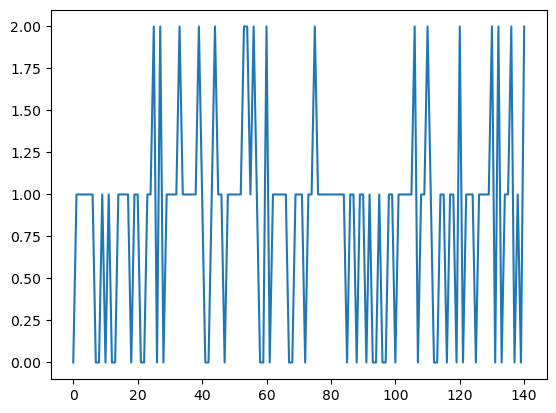

In [81]:
from matplotlib import pyplot

pyplot.plot(dataframe["political_affiliation"])

In [82]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_model.fit(dataframe[["political_affiliation"]].to_numpy())

center = kmeans_model.cluster_centers_

print(center)

[[3.33066907e-16]
 [1.00000000e+00]
 [2.00000000e+00]]


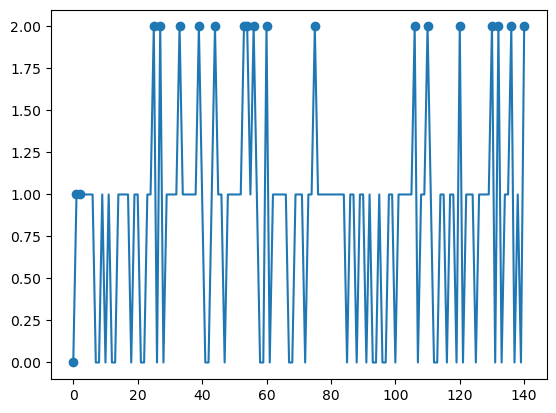

In [83]:
from math import sqrt

index = 0
distance_data = {}

for aff in dataframe["political_affiliation"]:
    distance1 = sqrt((aff - center[0])**2)
    distance2 = sqrt((aff - center[1])**2)
    sum_distance = distance1+distance2
    distance_data[index] = sum_distance
    index=index+1

# Sort the dictionary by value
top_5_X = []
top_5_Y = []

for point in sorted(distance_data,key=distance_data.get,reverse=True):
    top_5_X.append(point)
    top_5_Y.append(dataframe["political_affiliation"][point])

#Take the top 5 values as anomalous and plot them

# First plot the original data
pyplot.plot(range(len(dataframe["political_affiliation"])), dataframe["political_affiliation"])

# Then add a layer scatter plotting the anomalous points
pyplot.scatter(top_5_X[:20],top_5_Y[:20])

In [84]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

pca = PCA(2)
 
#Transform the data
df = pd.DataFrame()
df.insert(loc=0, column='political_affiliation', value=dataframe["political_affiliation"])
df.insert(loc=1, column='fatalities', value=dataframe["fatalities"])

df = pca.fit_transform(df)
 
df.shape

(141, 2)

In [85]:
kmeans = KMeans(n_clusters= 3)

label = kmeans.fit_predict(df)
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1]


/Users/rosalynlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


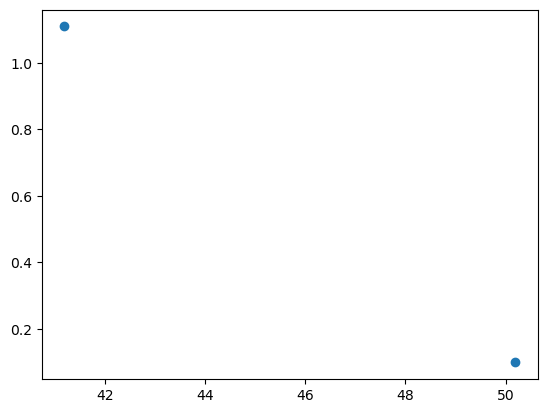

In [86]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = df[label == 0]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

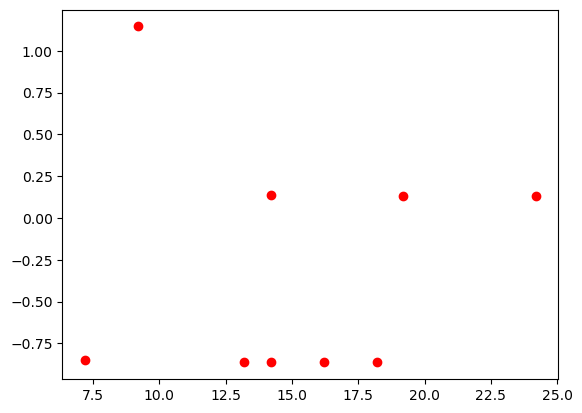

In [87]:
filtered_label2 = df[label == 2]

filtered_label8 = df[label == 8]

plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

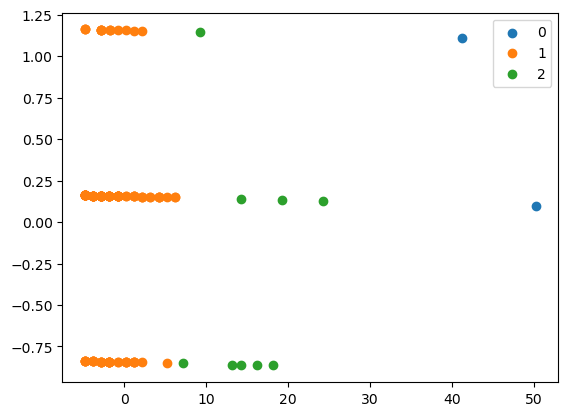

In [88]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()